# **1.Pretrained model + LSTM**

##vgg16

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

train1 = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True,
                              
                               )  

test1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
train=train1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid=train1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test=test1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
120/32

3.75

In [ ]:
type(train)

keras.preprocessing.image.DirectoryIterator

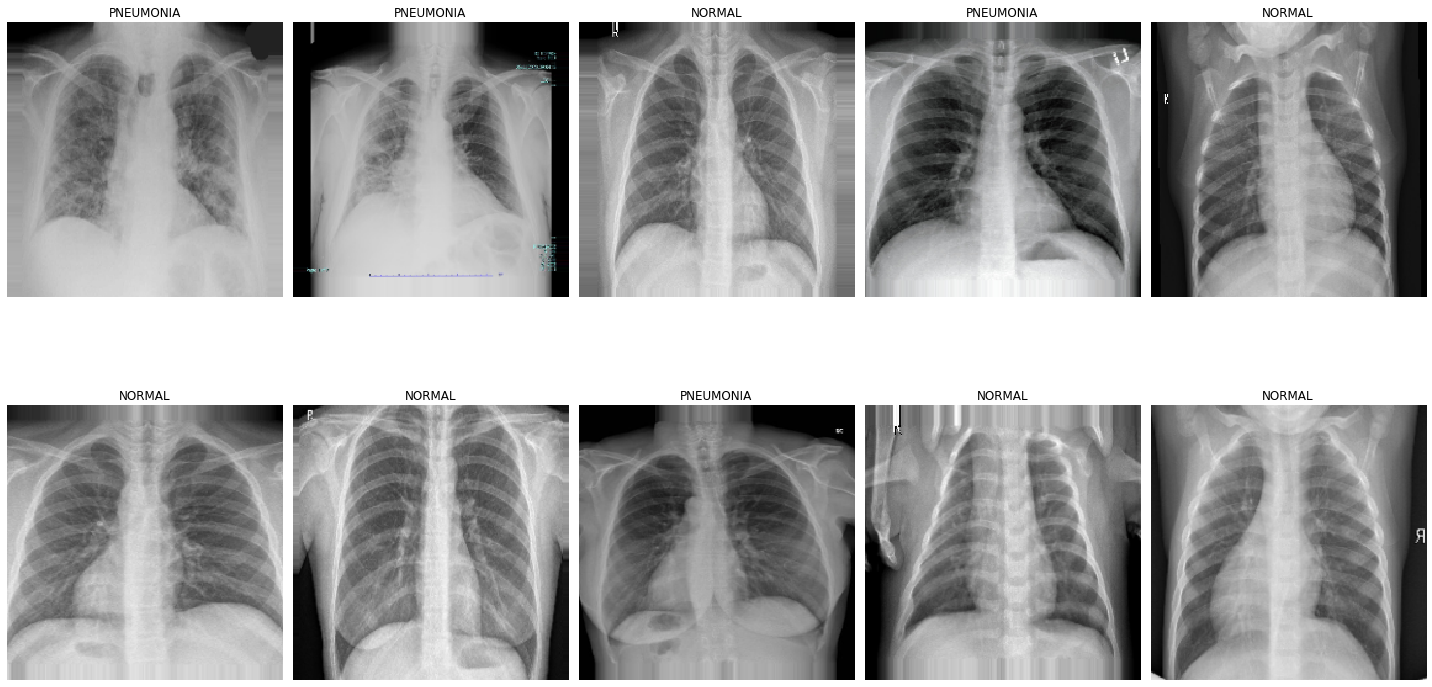

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#model = VGG16(weights='imagenet')
model.summary()


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(4096,activation='relu')(x)
prediction=Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
train

In [ ]:
# fit the model
history = model.fit(
 train,
  
  validation_data=valid,
  epochs=20,steps_per_epoch=len(train),
  callbacks=[early_stop,checkpoint],
  batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 9.5110 - accuracy: 0.5250

4/4 [==============================] - 33s 6s/step - loss: 9.5110 - accuracy: 0.5250 - val_loss: 2.2906 - val_accuracy: 0.8214
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 2.8199 - accuracy: 0.6917

4/4 [==============================] - 6s 2s/step - loss: 2.8199 - accuracy: 0.6917 - val_loss: 1.4362 - val_accuracy: 0.8929
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.8616 - accuracy: 0.9250

4/4 [==============================] - 6s 2s/step - loss: 0.8616 - accuracy: 0.9250 - val_loss: 2.4089 - val_accuracy: 0.7857
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 1.5247 - accuracy: 0.8417

4/4 [==============================] - 6s 2s/step - loss: 1.5247 - accuracy: 0.8417 - val_loss: 0.6341 - val_accuracy: 0.8929
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.9333

4/4 [==============================] - 6s 2s/step - loss: 0.5694 - accuracy: 0.9333 - val_loss: 2.1478 - val_accuracy: 0.8214
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.3823 - accuracy: 0.9500

4/4 [==============================] - 6s 2s/step - loss: 0.3823 - accuracy: 0.9500 - val_loss: 0.0342 - val_accuracy: 0.9643
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.7282 - accuracy: 0.9167

4/4 [==============================] - 6s 2s/step - loss: 0.7282 - accuracy: 0.9167 - val_loss: 0.6107 - val_accuracy: 0.9286
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.9250

4/4 [==============================] - 6s 2s/step - loss: 0.4821 - accuracy: 0.9250 - val_loss: 0.0964 - val_accuracy: 0.9643
Epoch 9/20
4/4 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.9333

4/4 [==============================] - 6s 2s/step - loss: 0.1899 - accuracy: 0.9333 - val_loss: 1.9598 - val_accuracy: 0.7143
Epoch 10/20
4/4 [==============================] - ETA: 0s - loss: 0.6827 - accuracy: 0.8917

4/4 [==============================] - 6s 2s/step - loss: 0.6827 - accuracy: 0.8917 - val_loss: 7.9875e-04 - val_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.0963 - accuracy: 0.9750 - val_loss: 1.1727 - val_accuracy: 0.8214
Epoch 12/20
4/4 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.9083

4/4 [==============================] - 6s 2s/step - loss: 0.5549 - accuracy: 0.9083 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 13/20
4/4 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9917

4/4 [==============================] - 6s 2s/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.2440 - val_accuracy: 0.9643
Epoch 14/20
4/4 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9667

4/4 [==============================] - 6s 2s/step - loss: 0.0805 - accuracy: 0.9667 - val_loss: 0.0777 - val_accuracy: 0.9286
Epoch 15/20
4/4 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.0452 - accuracy: 0.9750 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 15: early stopping


In [ ]:
model.evaluate(test)

2/2 [==============================] - 4s 4s/step - loss: 0.0130 - accuracy: 1.0000


[0.012983771041035652, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred)

array([[11,  9],
       [ 9, 11]])

In [ ]:
print(classification_report(test.classes,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.55      0.55      0.55        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



##vgg19

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

train1 = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True,
                              
                               )  

test1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
train=train1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid=train1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test=test1.flow_from_directory("/content/drive/MyDrive/Datasets /Pneumonia Dataset/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
vgg_model=VGG19(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=1,classifier_activation='sigmoid')

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
!pip3 install resnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10042 sha256=3849967aadb36b338504ad3b7e5e60efff2d4969083680324a189fcc00cee625
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Model
#import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
x = Flatten()(vgg_model.output)
x=Dense(4096,activation='relu')(x)

In [ ]:
prediction=Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=vgg_model.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
train

In [ ]:
# fit the model
history = model.fit(train,validation_data=valid,epochs=20,callbacks=[early_stop,checkpoint],batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 24.6415 - accuracy: 0.5250

4/4 [==============================] - 9s 2s/step - loss: 24.6415 - accuracy: 0.5250 - val_loss: 6.1061 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 3.2869 - accuracy: 0.6583

4/4 [==============================] - 6s 2s/step - loss: 3.2869 - accuracy: 0.6583 - val_loss: 1.1669 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 1.0753 - accuracy: 0.8583

4/4 [==============================] - 6s 2s/step - loss: 1.0753 - accuracy: 0.8583 - val_loss: 0.6587 - val_accuracy: 0.9286
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.9333

4/4 [==============================] - 6s 2s/step - loss: 0.6053 - accuracy: 0.9333 - val_loss: 0.4827 - val_accuracy: 0.9286
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.5252 - accuracy: 0.9083

4/4 [==============================] - 7s 2s/step - loss: 0.5252 - accuracy: 0.9083 - val_loss: 1.2844 - val_accuracy: 0.8571
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9583

4/4 [==============================] - 7s 2s/step - loss: 0.1387 - accuracy: 0.9583 - val_loss: 0.2515 - val_accuracy: 0.9286
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.9417

4/4 [==============================] - 6s 2s/step - loss: 0.2767 - accuracy: 0.9417 - val_loss: 0.0988 - val_accuracy: 0.9286
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.9833

4/4 [==============================] - 6s 2s/step - loss: 0.1075 - accuracy: 0.9833 - val_loss: 0.7159 - val_accuracy: 0.8929
Epoch 9/20
4/4 [==============================] - ETA: 0s - loss: 0.1418 - accuracy: 0.9667

4/4 [==============================] - 6s 2s/step - loss: 0.1418 - accuracy: 0.9667 - val_loss: 0.2510 - val_accuracy: 0.9286
Epoch 10/20
4/4 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9667

4/4 [==============================] - 6s 2s/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 0.2509 - val_accuracy: 0.8571
Epoch 10: early stopping


In [ ]:
model.evaluate(test)

2/2 [==============================] - 1s 96ms/step - loss: 0.0503 - accuracy: 0.9750


[0.0503428690135479, 0.9750000238418579]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred)

array([[ 8, 12],
       [11,  9]])

In [ ]:
print(classification_report(test.classes,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.40      0.41        20
           1       0.43      0.45      0.44        20

    accuracy                           0.42        40
   macro avg       0.42      0.43      0.42        40
weighted avg       0.42      0.42      0.42        40



##lstm for vgg16

In [ ]:
import keras,os
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Conv2D, MaxPool2D , Flatten, LSTM, GRU, Lambda, Reshape, Bidirectional, Concatenate
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19



from tensorflow.keras.optimizers import RMSprop


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=(224,224,3),weights="imagenet", include_top=False)

vgg.layers.pop()
for l in vgg.layers[:]:
    l.trainable = False
x=Flatten()(vgg.output)

x4 = Dense(1024)(x)
x4 = Reshape(target_shape=(1024, 1))(x4)
x4 = LSTM(1, return_sequences=True, input_shape=(1024,1))(x4)
x4 = LSTM(276, return_sequences=False)(x4)
x4 = Dense(276)(x4)
x4=Dense(1,activation='sigmoid')(x4)

In [ ]:
 model = Model(inputs=vgg.inputs, outputs=x4) 

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
# fit the model
history = model.fit(
 train,
  
  validation_data=valid,
  epochs=20,steps_per_epoch=len(train),
  callbacks=[early_stop,checkpoint],
  batch_size=32,shuffle=True)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.6833

4/4 [==============================] - 12s 2s/step - loss: 0.6523 - accuracy: 0.6833 - val_loss: 0.5395 - val_accuracy: 0.6786
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.8583

4/4 [==============================] - 6s 2s/step - loss: 0.3184 - accuracy: 0.8583 - val_loss: 0.1279 - val_accuracy: 0.9286
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.9333

4/4 [==============================] - 6s 2s/step - loss: 0.2830 - accuracy: 0.9333 - val_loss: 0.4679 - val_accuracy: 0.7857
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9417

4/4 [==============================] - 7s 2s/step - loss: 0.1969 - accuracy: 0.9417 - val_loss: 0.3108 - val_accuracy: 0.8929
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9333

4/4 [==============================] - 6s 2s/step - loss: 0.2186 - accuracy: 0.9333 - val_loss: 0.2187 - val_accuracy: 0.8929
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.1429 - accuracy: 0.9750 - val_loss: 0.1746 - val_accuracy: 0.9286
Epoch 7/20
4/4 [==============================] - ETA: 0s - loss: 0.1036 - accuracy: 0.9833

4/4 [==============================] - 6s 2s/step - loss: 0.1036 - accuracy: 0.9833 - val_loss: 0.1259 - val_accuracy: 0.9286
Epoch 8/20
4/4 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9583

4/4 [==============================] - 6s 2s/step - loss: 0.0917 - accuracy: 0.9583 - val_loss: 0.1682 - val_accuracy: 0.9286
Epoch 9/20
4/4 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9417

4/4 [==============================] - 6s 2s/step - loss: 0.1081 - accuracy: 0.9417 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9667

4/4 [==============================] - 6s 2s/step - loss: 0.1447 - accuracy: 0.9667 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 11/20
4/4 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.1476 - val_accuracy: 0.9643
Epoch 12/20
4/4 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9833

4/4 [==============================] - 6s 2s/step - loss: 0.0379 - accuracy: 0.9833 - val_loss: 0.0983 - val_accuracy: 0.9643
Epoch 13/20
4/4 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9833

4/4 [==============================] - 6s 2s/step - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.1757 - val_accuracy: 0.9643
Epoch 14/20
4/4 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 1.0000

4/4 [==============================] - 6s 2s/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 15/20
4/4 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9917

4/4 [==============================] - 6s 2s/step - loss: 0.0146 - accuracy: 0.9917 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 16/20
4/4 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9917

4/4 [==============================] - 6s 2s/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.1483 - val_accuracy: 0.8929
Epoch 17/20
4/4 [==============================] - ETA: 0s - loss: 0.1078 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.1078 - accuracy: 0.9750 - val_loss: 0.1036 - val_accuracy: 0.9286
Epoch 18/20
4/4 [==============================] - ETA: 0s - loss: 0.0954 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.0954 - accuracy: 0.9750 - val_loss: 0.0629 - val_accuracy: 0.9643
Epoch 19/20
4/4 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9750

4/4 [==============================] - 6s 2s/step - loss: 0.0532 - accuracy: 0.9750 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 19: early stopping


In [ ]:
model.evaluate(test)

2/2 [==============================] - 1s 81ms/step - loss: 0.0638 - accuracy: 0.9500


[0.06382164359092712, 0.949999988079071]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred)

array([[11,  9],
       [11,  9]])

In [ ]:
print(classification_report(test.classes,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        20
           1       0.50      0.45      0.47        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



# **2. LSTM in stock market forecasting**

In [ ]:
!pip install --upgrade pandas-datareader==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from pandas_datareader import DataReader
import yfinance as yf
from datetime import datetime

In [ ]:
tech_list=['AAPL','MSFT']   


In [ ]:
end=datetime.now()
start=datetime(end.year -10 ,end.month,end.day)

In [ ]:
start,end

(datetime.datetime(2012, 9, 16, 0, 0),
 datetime.datetime(2022, 9, 16, 8, 33, 12, 584030))

In [ ]:
for stock in tech_list:
  globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list=[AAPL,MSFT]#symbol present in yfinance
company_name=["Apple","Microsoft"]#Actual company name
ma_days=[10,20,50]
for ma in ma_days:
  for company in company_list:
    column_name=f'MA FOR {ma} DAYS'
    company[column_name]=company['Close'].rolling(ma).mean()

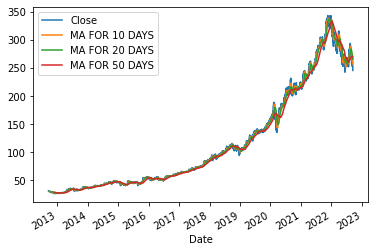

In [ ]:
MSFT[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot()

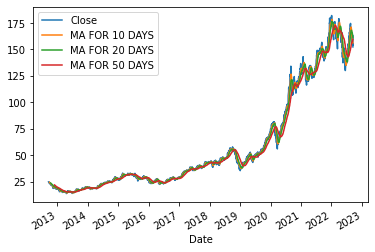

In [ ]:
AAPL[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot()

In [ ]:
apple_data=AAPL.filter(['Close'])
apple_data.head()

Close
Date                 
2012-09-17  24.992144
2012-09-18  25.068214
2012-09-19  25.075001
2012-09-20  24.953571
2012-09-21  25.003214

In [ ]:
dataset=apple_data.values

In [ ]:
training_data_len=int(np.ceil(len(dataset)*.85))

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
train_data=scaled_data[0:int(training_data_len),:]

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2079, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(2079, 60, 1)

In [ ]:
#build the model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1))))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(16,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=2,callbacks=[earlystop],epochs=25)

Epoch 1/25
1040/1040 [==============================] - 29s 20ms/step - loss: 0.0012
Epoch 2/25
1040/1040 [==============================] - 21s 20ms/step - loss: 3.1335e-04
Epoch 3/25
1040/1040 [==============================] - 20s 19ms/step - loss: 3.2644e-04
Epoch 4/25
1040/1040 [==============================] - 20s 19ms/step - loss: 2.7197e-04
Epoch 5/25
1040/1040 [==============================] - 20s 19ms/step - loss: 3.4675e-04
Epoch 6/25
1040/1040 [==============================] - 20s 20ms/step - loss: 2.2973e-04
Epoch 7/25
1040/1040 [==============================] - 20s 20ms/step - loss: 1.7567e-04
Epoch 8/25
1040/1040 [==============================] - 20s 20ms/step - loss: 1.6233e-04
Epoch 9/25
1040/1040 [==============================] - 20s 19ms/step - loss: 1.7825e-04
Epoch 10/25
1040/1040 [==============================] - 21s 21ms/step - loss: 1.5724e-04
Epoch 11/25
1040/1040 [==============================] - 20s 19ms/step - loss: 1.9008e-04
Epoch 12/25
1040/1040 [

In [ ]:
test_data=scaled_data[training_data_len-60:,:]

In [ ]:
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions=scaler.inverse_transform(predictions)

In [ ]:
y_test.shape

(377, 1)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [ ]:
rmse

5.8882021133912215

In [ ]:
train=apple_data[:training_data_len]
valid=apple_data[training_data_len:]
valid['prediction']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


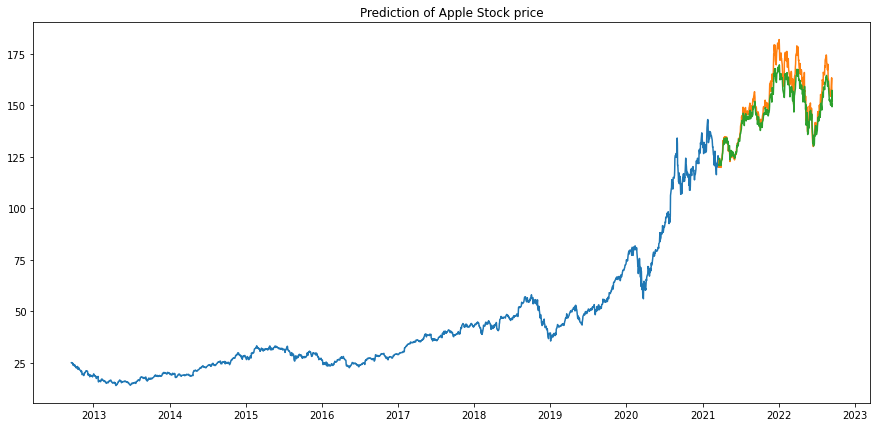

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.title("Prediction of Apple Stock price")
plt.show()

In [ ]:
microsoft_data=MSFT.filter(['Close'])
microsoft_data.head()

Close
Date                 
2012-09-17  31.209999
2012-09-18  31.180000
2012-09-19  31.049999
2012-09-20  31.450001
2012-09-21  31.190001

In [ ]:
dataset=microsoft_data.values

In [ ]:
training_data_len=int(np.ceil(len(dataset)*.85))

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
train_data=scaled_data[0:int(training_data_len),:]

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2079, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#build the model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1))))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(16,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=2,callbacks=[earlystop],epochs=20)

Epoch 1/20
1040/1040 [==============================] - 31s 19ms/step - loss: 7.7093e-04
Epoch 2/20
1040/1040 [==============================] - 21s 20ms/step - loss: 2.9207e-04
Epoch 3/20
1040/1040 [==============================] - 20s 19ms/step - loss: 3.1742e-04
Epoch 4/20
1040/1040 [==============================] - 20s 19ms/step - loss: 2.4248e-04
Epoch 5/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.9432e-04
Epoch 6/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.7505e-04
Epoch 7/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.7816e-04
Epoch 8/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.3923e-04
Epoch 9/20
1040/1040 [==============================] - 19s 19ms/step - loss: 1.5129e-04
Epoch 10/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.4158e-04
Epoch 11/20
1040/1040 [==============================] - 20s 19ms/step - loss: 1.4973e-04
Epoch 11: early sto

In [ ]:
test_data=scaled_data[training_data_len-60:,:]

In [ ]:
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [ ]:
rmse

9.319108292582102

In [ ]:
train=microsoft_data[:training_data_len]
valid=microsoft_data[training_data_len:]
valid['prediction']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


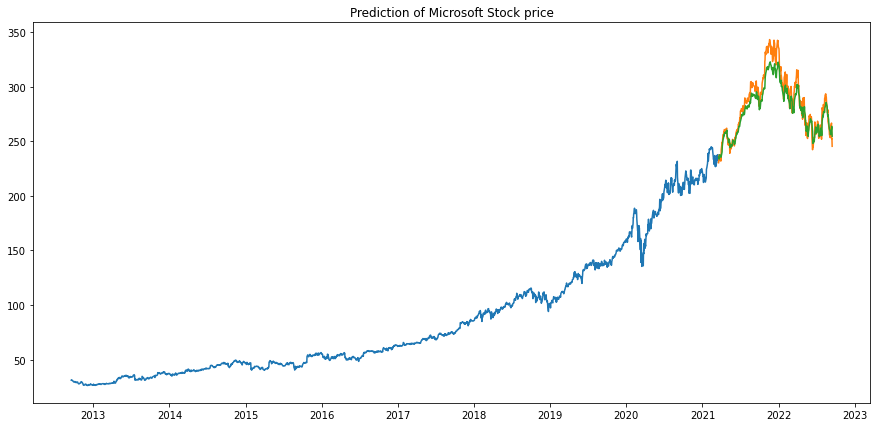

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.title("Prediction of Microsoft Stock price")
plt.show()

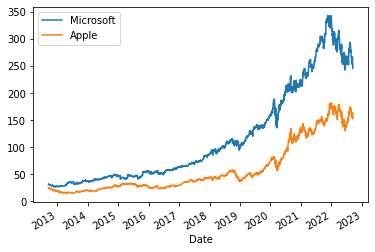

In [ ]:
MSFT["Close"].plot()
AAPL["Close"].plot()
plt.legend(["Microsoft","Apple"])

# **3.Denoising AutoEncoder**
**Butterfly Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D, Input
from keras.preprocessing import image
from math import log10,sqrt
from tqdm import tqdm #progress bar

In [ ]:
!unzip -q "/content/Butterfly Dataset-20220902T153735Z-001.zip" -d "/content/drive/MyDrive/"

In [ ]:
test_path="/content/drive/MyDrive/Butterfly Dataset/test"
train_path="/content/drive/MyDrive/Butterfly Dataset/train"

In [ ]:
import os
train=[]
for filename in os.listdir(train_path):
  #print(filename)
  if filename.endswith(".jpg"):
    img=image.load_img(train_path+"/"+filename,target_size=(128,128))
    img = image.img_to_array(img)
    train.append(img)
train =np.array(train)

test=[]
for filename in os.listdir(test_path):
  #print(filename)
  if filename.endswith(".jpg"):
    img=image.load_img(test_path+"/"+filename,target_size=(128,128))
    img = image.img_to_array(img)
    test.append(img)
test =np.array(test)

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential, Model,Input
from keras.layers import Dense,Conv2D, MaxPooling2D,Conv2DTranspose
from keras.datasets import mnist

In [ ]:
x_train = train.astype('float32')/255
x_test = test.astype('float32')/255

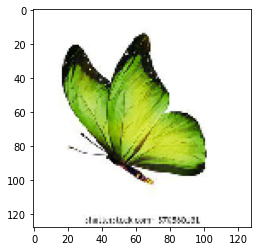

In [ ]:
#plt.subplot(221)
plt.imshow(x_train[20])
plt.show()

In [ ]:
num_pixels=x_train.shape[1]*x_train.shape[2]
num_pixels

16384

In [ ]:
x_train.shape

(40, 128, 128, 3)

In [ ]:
x_train=x_train.reshape(len(x_train),num_pixels,3)

In [ ]:
x_test=x_test.reshape(len(x_test),num_pixels,3)

In [ ]:
import numpy as np
noise_factor=0.2
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)


In [ ]:
x_train_noisy=numpy.clip(x_train_noisy,0.,1.)
x_test_noisy=numpy.clip(x_test_noisy,0.,1.)


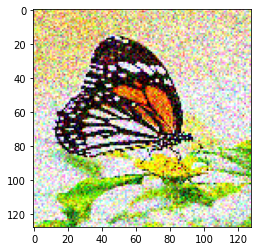

In [ ]:
plt.imshow(x_train_noisy[11].reshape(128,128,3))
plt.show()

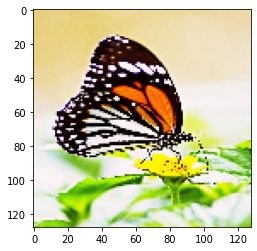

In [ ]:
plt.imshow(x_train[11].reshape(128,128,3))
plt.show()

In [ ]:
#create the model
model=Sequential()
model.add(Dense(600,input_shape=(num_pixels,3),activation='relu'))
model.add(Dense(500,activation='relu'))

model.add(Dense(100,activation='relu'))#code layer
#decoder

model.add(Dense(500,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16384, 600)        2400      
                                                                 
 dense_12 (Dense)            (None, 16384, 500)        300500    
                                                                 
 dense_13 (Dense)            (None, 16384, 100)        50100     
                                                                 
 dense_14 (Dense)            (None, 16384, 500)        50500     
                                                                 
 dense_15 (Dense)            (None, 16384, 600)        300600    
                                                                 
 dense_16 (Dense)            (None, 16384, 3)          1803      
                                                                 
Total params: 705,903
Trainable params: 705,903
Non-tr

In [ ]:
import keras
input_img = keras.Input(shape=(num_pixels,3))
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation="relu")(encoded)
encoded = Dense(32,activation="relu")(encoded)

decoded = Dense(64,activation="relu")(encoded)
decoded = Dense(128,activation="relu")(decoded)
decoded = Dense(3,activation="sigmoid")(decoded)

model = Model(input_img,decoded)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 16384, 3)]        0         
                                                                 
 dense_17 (Dense)            (None, 16384, 128)        512       
                                                                 
 dense_18 (Dense)            (None, 16384, 64)         8256      
                                                                 
 dense_19 (Dense)            (None, 16384, 32)         2080      
                                                                 
 dense_20 (Dense)            (None, 16384, 64)         2112      
                                                                 
 dense_21 (Dense)            (None, 16384, 128)        8320      
                                                                 
 dense_22 (Dense)            (None, 16384, 3)          387 

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train_noisy,x_train_noisy,epochs=50,batch_size=300,validation_data=(x_test_noisy,x_test_noisy))

Epoch 1/50
1/1 [==============================] - 1s 982ms/step - loss: 0.1129 - val_loss: 0.1101
Epoch 2/50
1/1 [==============================] - 0s 137ms/step - loss: 0.1115 - val_loss: 0.1092
Epoch 3/50
1/1 [==============================] - 0s 130ms/step - loss: 0.1102 - val_loss: 0.1082
Epoch 4/50
1/1 [==============================] - 0s 130ms/step - loss: 0.1090 - val_loss: 0.1073
Epoch 5/50
1/1 [==============================] - 0s 127ms/step - loss: 0.1079 - val_loss: 0.1064
Epoch 6/50
1/1 [==============================] - 0s 130ms/step - loss: 0.1067 - val_loss: 0.1055
Epoch 7/50
1/1 [==============================] - 0s 165ms/step - loss: 0.1055 - val_loss: 0.1044
Epoch 8/50
1/1 [==============================] - 0s 128ms/step - loss: 0.1041 - val_loss: 0.1033
Epoch 9/50
1/1 [==============================] - 0s 128ms/step - loss: 0.1027 - val_loss: 0.1021
Epoch 10/50
1/1 [==============================] - 0s 126ms/step - loss: 0.1011 - val_loss: 0.1008
Epoch 11/50
1/1 [==

In [ ]:
output=model.predict(x_test_noisy)

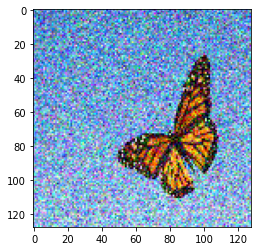

In [ ]:
plt.imshow(x_test_noisy[12].reshape(128,128,3))
plt.show()

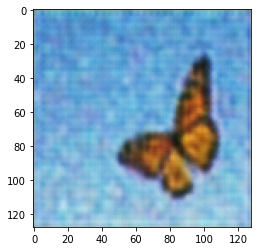

In [ ]:
plt.imshow(output[12].reshape(128,128,3))
plt.show()

##Denoising using convolution autoencoder

In [ ]:
x_train_noisy.shape

(40, 16384, 3)

In [ ]:
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),128,128,3)

In [ ]:
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),128,128,3)

In [ ]:
input=Input(shape=(128,128,3))
#Encoder
x=Conv2D(64,(3,3),activation='relu',padding='same')(input)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)
#Decoder
x=Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)

x=Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same')(x)
x=Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)
autoencoder_denoise=Model(input,x)

In [ ]:
autoencoder_denoise.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 64, 32)       9248

In [ ]:
autoencoder_denoise.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
autoencoder_denoise.fit(x_train_noisy,x_train_noisy,epochs=200,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test_noisy))

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6935 - val_loss: 0.6927
Epoch 2/200
1/1 [==============================] - 0s 110ms/step - loss: 0.6926 - val_loss: 0.6921
Epoch 3/200
1/1 [==============================] - 0s 105ms/step - loss: 0.6917 - val_loss: 0.6913
Epoch 4/200
1/1 [==============================] - 0s 106ms/step - loss: 0.6906 - val_loss: 0.6903
Epoch 5/200
1/1 [==============================] - 0s 107ms/step - loss: 0.6891 - val_loss: 0.6890
Epoch 6/200
1/1 [==============================] - 0s 108ms/step - loss: 0.6871 - val_loss: 0.6873
Epoch 7/200
1/1 [==============================] - 0s 111ms/step - loss: 0.6845 - val_loss: 0.6854
Epoch 8/200
1/1 [==============================] - 0s 105ms/step - loss: 0.6813 - val_loss: 0.6835
Epoch 9/200
1/1 [==============================] - 0s 106ms/step - loss: 0.6778 - val_loss: 0.6821
Epoch 10/200
1/1 [==============================] - 0s 104ms/step - loss: 0.6744 - val_loss: 0.6810
Epoch 11/200

In [ ]:
output=autoencoder_denoise.predict(x_test_noisy)

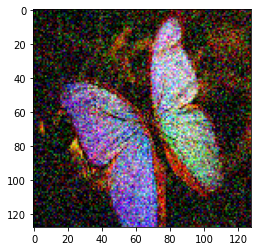

In [ ]:
plt.imshow(x_test_noisy[10].reshape(128,128,3))

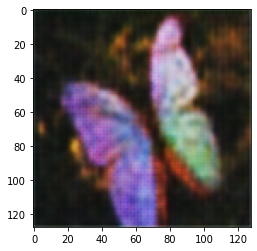

In [ ]:
plt.imshow(output[10].reshape(128,128,3))

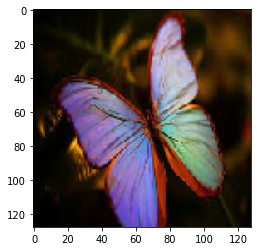

In [ ]:
plt.imshow(x_test[10].reshape(128,128,3))

In [ ]:
def PSNR(noised,denoised):
  mse=np.mean((noised-denoised)**2)
  if (mse==0):
    return 100
  max_pizel=255.0
  psnr=20*log10(max_pizel/sqrt(mse))
  return psnr

In [ ]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0}

In [ ]:
def train_model1(input_layer,output_layer,optimizer,epochs,batch_size):
  model=Model(input_layer,output_layer) 
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["mean_squared_error"])
  print("with",optimizer,"epochs",epochs)
  model.fit(x_train_noisy,x_train_noisy,epochs=epochs,batch_size=batch_size,validation_data=(x_test_noisy,x_test_noisy),verbose=0)
  decoded_images=model.predict(x_test_noisy)
  n=10
  
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Noised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    ax=plt.subplot(2,n,i)
    plt.suptitle("Denoised",fontsize=20)
    plt.imshow(decoded_images[i].reshape(128,128,3))
    plt.gray()
    plt.title(f"PSNR:{round(PSNR(x_test_noisy[i],decoded_images[i]),2)}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
def train_model2(input_layer,output_layer,optimizer,epochs,batch_size):
  autoencoder_denoise=Model(input_layer,output_layer) 
  autoencoder_denoise.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["mean_squared_error"])
  print("with",optimizer,"epochs",epochs)
  autoencoder_denoise.fit(x_train_noisy,x_train_noisy,epochs=epochs,batch_size=batch_size,validation_data=(x_test_noisy,x_test_noisy),verbose=0)
  decoded_images=autoencoder_denoise.predict(x_test_noisy)
  n=10
  
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Noised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
  plt.figure(figsize=(20,8))
  for i in range(1,n+1):
    plt.suptitle("Denoised",fontsize=20)
    ax=plt.subplot(2,n,i)
    plt.imshow(decoded_images[i].reshape(128,128,3))
    plt.gray()
    plt.title(f"PSNR:{round(PSNR(x_test_noisy[i],decoded_images[i]),2)}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
x_train = train.astype('float32')/255
x_test = test.astype('float32')/255

In [ ]:
x_train=x_train.reshape(len(x_train),num_pixels,3)

In [ ]:
x_test=x_test.reshape(len(x_test),num_pixels,3)

In [ ]:
noise_factor=0.2
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)


In [ ]:
x_train_noisy=numpy.clip(x_train_noisy,0.,1.)
x_test_noisy=numpy.clip(x_test_noisy,0.,1.)


  0%|          | 0/3 [00:00<?, ?it/s]

with adam epochs 100


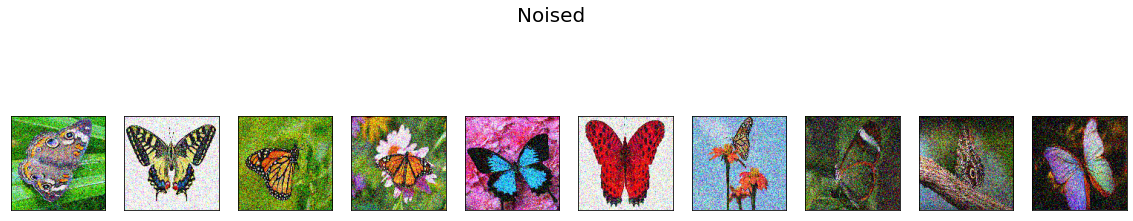

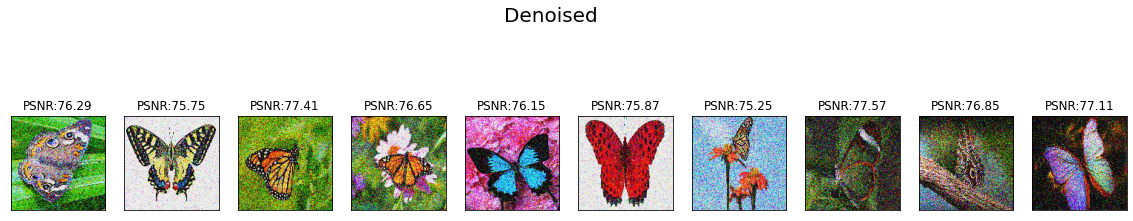

 33%|███▎      | 1/3 [00:14<00:29, 14.75s/it]

with rmsprop epochs 100


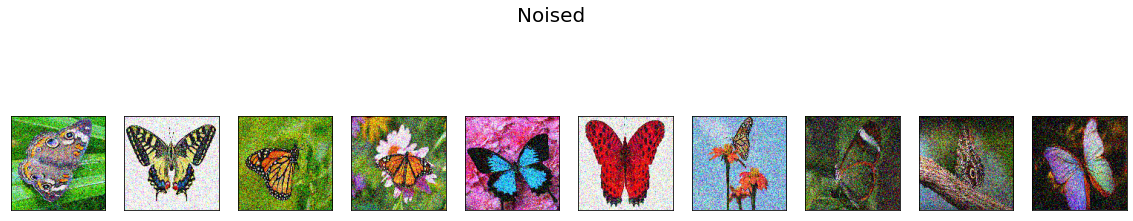

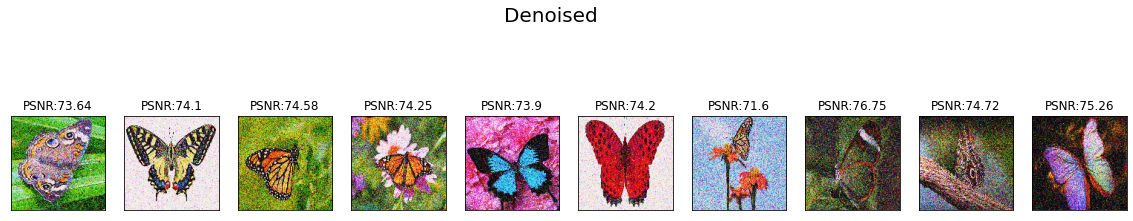

 67%|██████▋   | 2/3 [00:30<00:15, 15.52s/it]

with adadelta epochs 100


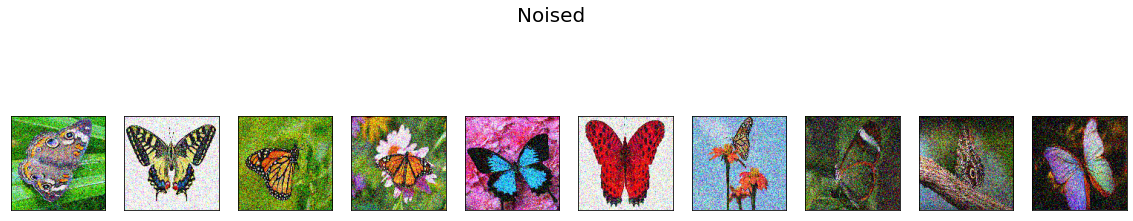

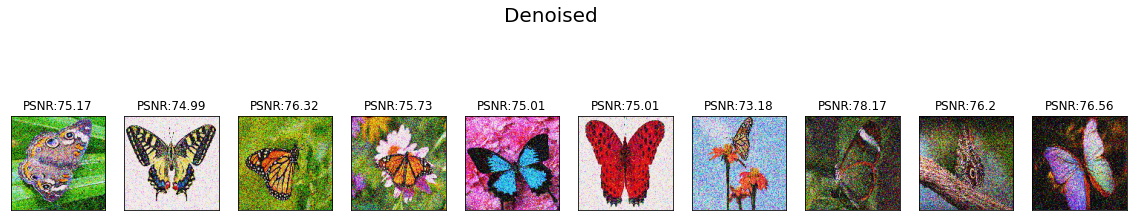

100%|██████████| 3/3 [00:46<00:00, 15.38s/it]


In [ ]:
for i in tqdm(["adam","rmsprop","adadelta"]):
    train_model1(input_img,decoded,i,100,128)

In [ ]:
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),128,128,3)

In [ ]:
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),128,128,3)

  0%|          | 0/3 [00:00<?, ?it/s]

with adam epochs 100


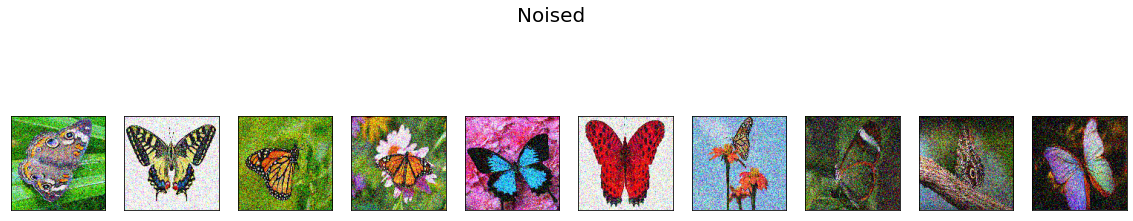

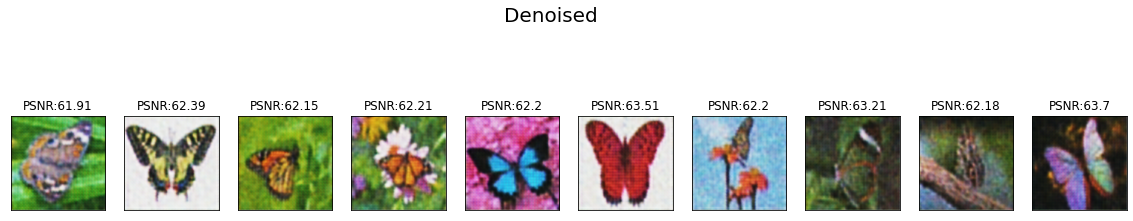

 33%|███▎      | 1/3 [00:21<00:43, 21.89s/it]

with rmsprop epochs 100


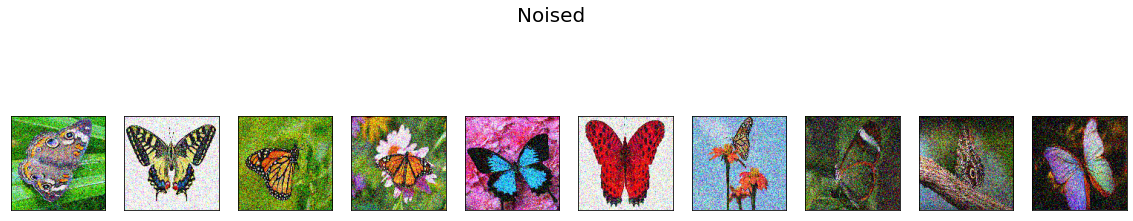

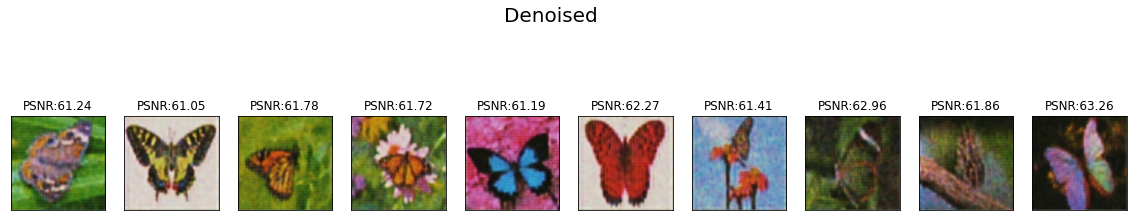

 67%|██████▋   | 2/3 [00:35<00:16, 16.95s/it]

with adadelta epochs 100


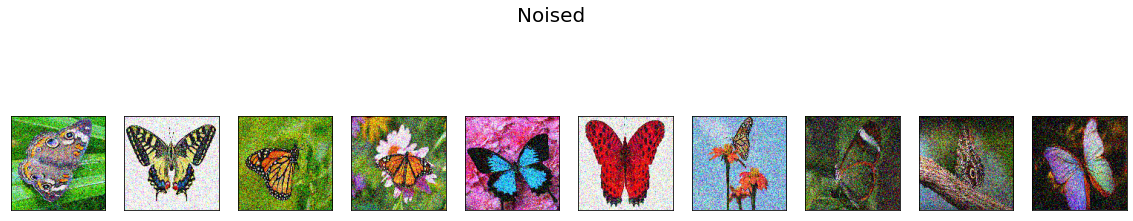

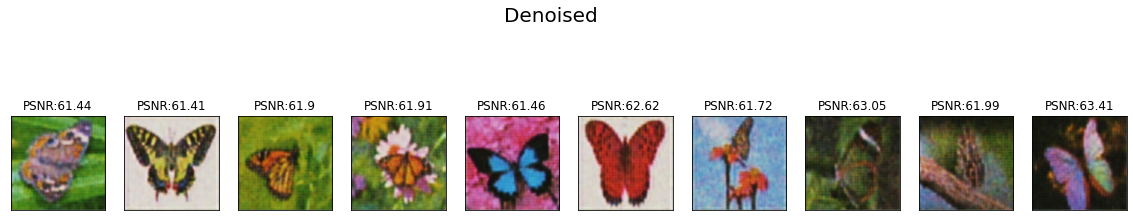

100%|██████████| 3/3 [00:48<00:00, 16.27s/it]


In [ ]:
for i in tqdm(["adam","rmsprop","adadelta"]):
    train_model2(input,x,i,100,128)